# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_4DVARQG.py'

In [2]:
import sys
sys.path.append('../..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_4DVARQG
saveoutputs: True
name_exp_save: 2020a_4DVARQG
path_save: outputs/2020a_4DVARQG
tmp_DA_path: scratch/2020a_4DVARQG
init_date: 2012-10-01 00:00:00
final_date: 2012-12-15 00:00:00
assimilation_time_step: 6:00:00
saveoutput_time_step: 6:00:00
flag_plot: 0
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None



## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_CAR
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dx: 10.0
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_JAX
name_var: {'SSH': 'ssh'}
init_from_bc: True
name_init_var: {}
dir_model: None
var_to_save: None
multiscale: False
advect_tracer: False
dtmodel: 1200
time_scheme: rk2
upwind: 3
upwind_adj: None
Reynolds: False
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81



In [6]:
from src import bc as bc
Bc = bc.Bc(config)

super: BC_EXT
file: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_lon: lon
name_lat: lat
name_time: time
name_var: {'SSH': 'gssh'}
dist_sponge: None

<xarray.Dataset>
Dimensions:  (lat: 162, lon: 394, time: 365)
Coordinates:
  * lat      (lat) float64 26.88 27.12 27.38 27.62 ... 66.38 66.62 66.88 67.12
  * lon      (lon) float64 -90.12 -89.88 -89.62 -89.38 ... 7.625 7.875 8.125
  * time     (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2013-09-30
Data variables:
    gssh     (time, lat, lon) float64 dask.array<chunksize=(365, 162, 394), meta=np.ndarray>


## Observations

In [7]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt

J1:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_jason1.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 92 tracks selected

EN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_envisat.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 79 tracks selected

TPN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_topex-poseidon_interleaved.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var

In [8]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

super: OBSOP_INTERP
path_save: None
compute_op: False
Npix: 4
mask_coast: False
dist_coast: 100
mask_borders: False



## Reduced Basis

In [9]:
from src import basis as basis
Basis = basis.Basis(config,State)

super: BASIS_BM
name_mod_var: ssh
wavelet_init: False
flux: False
save_wave_basis: False
facns: 1.0
facnlt: 2.0
npsp: 3.5
facpsp: 1.5
lmin: 80
lmax: 970.0
lmeso: 300
tmeso: 10
sloptdec: -0.5
factdec: 0.5
tdecmin: 0.0
tdecmax: 20.0
facQ: 1
Qmax: 0.03
slopQ: -2
path_background: None
var_background: None



## Assimilation

In [10]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

super: INV_4DVAR
compute_test: False
path_init_4Dvar: None
restart_4Dvar: False
gtol: 0.001
maxiter: 200
opt_method: L-BFGS-B
save_minimization: False
timestep_checkpoint: 6:00:00
sigma_R: 0.01
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False
anomaly_from_bc: False

--> 301 checkpoints to evaluate the cost function
lambda=9.7E+02 nlocs=4.0E+00 tdec=9.0E+00 Q=2.1E-02
lambda=6.8E+02 nlocs=4.0E+00 tdec=7.5E+00 Q=2.1E-02
lambda=4.8E+02 nlocs=8.0E+00 tdec=6.3E+00 Q=2.1E-02
lambda=3.3E+02 nlocs=9.0E+00 tdec=5.3E+00 Q=2.1E-02
lambda=2.3E+02 nlocs=1.5E+01 tdec=4.4E+00 Q=1.3E-02
lambda=1.6E+02 nlocs=2.3E+01 tdec=3.7E+00 Q=6.3E-03
lambda=1.1E+02 nlocs=4.2E+01 tdec=3.1E+00 Q=3.1E-03
lambda=8.0E+01 nlocs=7.0E+01 tdec=2.6E+00 Q=1.5E-03
reduced order: 3168928 --> 154926
 reduced factor: 20

*** Minimization ***



2023-02-08 16:16:51.139565: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit_step_adj] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-02-08 16:17:28.807225: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m37.667786651s

********************************
[Compiling module jit_step_adj] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       154926     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37409D+07    |proj g|=  3.80447D+05


 This problem is unconstrained.



At iterate    1    f=  1.02504D+07    |proj g|=  2.36364D+05

At iterate    2    f=  7.87824D+06    |proj g|=  1.60418D+05

At iterate    3    f=  7.20149D+06    |proj g|=  4.51054D+05

At iterate    4    f=  6.01297D+06    |proj g|=  5.14626D+05

At iterate    5    f=  5.80966D+06    |proj g|=  1.19424D+05

At iterate    6    f=  5.58090D+06    |proj g|=  1.05128D+05

At iterate    7    f=  4.99612D+06    |proj g|=  3.26623D+05

At iterate    8    f=  4.82520D+06    |proj g|=  1.58797D+05

At iterate    9    f=  4.51356D+06    |proj g|=  9.08760D+04

At iterate   10    f=  4.29403D+06    |proj g|=  7.68758D+04

At iterate   11    f=  4.01589D+06    |proj g|=  1.73051D+05

At iterate   12    f=  3.95699D+06    |proj g|=  1.68716D+05

At iterate   13    f=  3.53399D+06    |proj g|=  1.49982D+05

At iterate   14    f=  3.35253D+06    |proj g|=  9.11738D+04

At iterate   15    f=  3.21451D+06    |proj g|=  1.07605D+05

At iterate   16    f=  3.00881D+06    |proj g|=  8.81526D+04

At iter

## Diagnostics

In [5]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: diags/2020a_4DVARQG
time_min: 2012-10-22 00:00:00
time_max: 2012-12-04 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data/dc_ref/NATL60-CJM165_GULFSTREAM*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: sossheig
options_ref: {'combine': 'nested', 'concat_dim': 'time', 'parallel': True}
name_exp_var: ssh
compare_to_baseline: True
name_bas: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: gssh



In [6]:
Diag.regrid_exp()

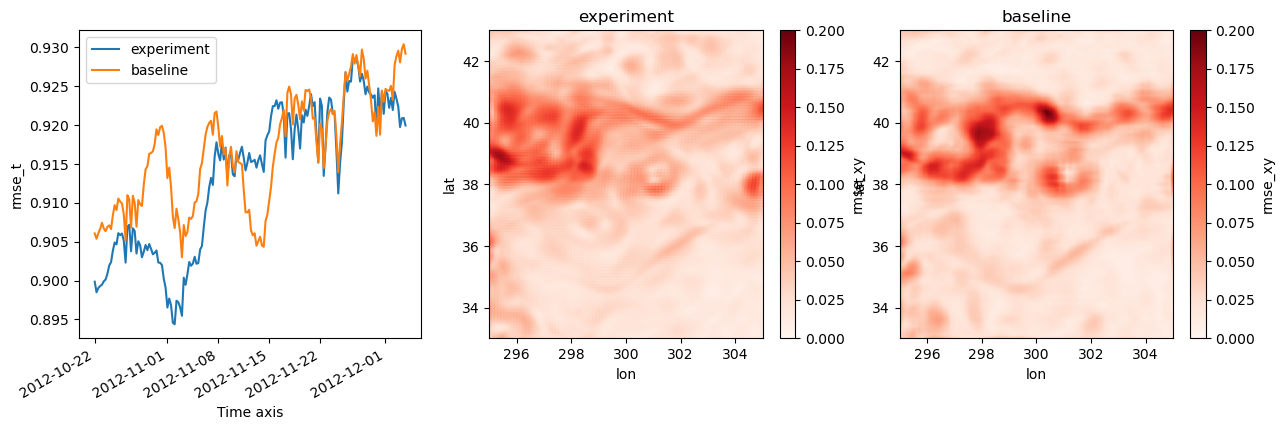

In [7]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


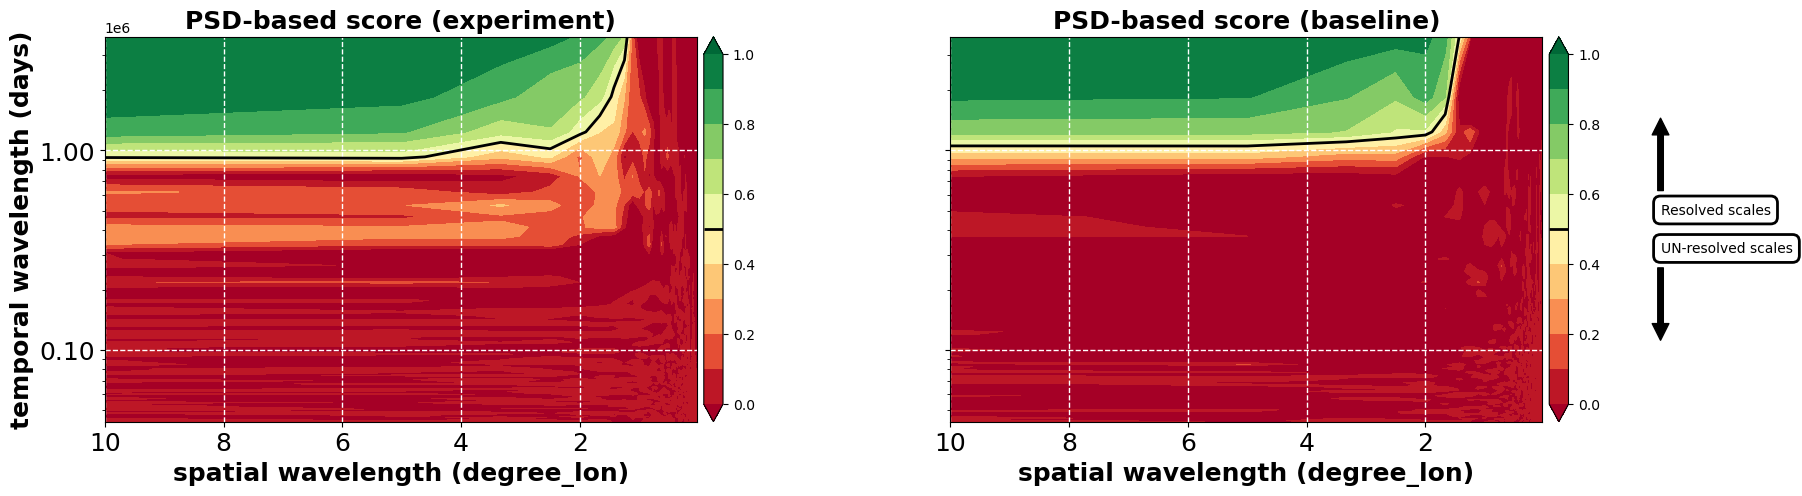

In [8]:
Diag.psd_based_scores(plot=True)

In [8]:
Diag.movie(framerate=12)

ffmpeg -f image2 -r 12 -pattern_type glob -i diags/2020a_4DVARQG/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 diags/2020a_4DVARQG/movie.mp4


ffmpeg version 9c33b2f Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/fleguillou/anaconda3 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3. 

In [9]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [12]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2020a_4DVARQG,0.91,0.01,1.20,10.58
1,baseline,0.92,0.01,1.43,12.18
